In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports


In [55]:
# Standard Library Imports
import sys

# Third-Party Library Imports
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import time
import os
import json

# Custom Module Imports (after appending the source code directory to sys.path)
sys.path.append("../src/visualization/edgebundling/")
from graphToDfUtility import GraphProcessingUtility
from graphReadingUtility import graphReadingUtility
from frLayoutUtility import frLayoutUtility
from addZCoordinate import ZCoordinateAdder
from pruneEdges import pruneEdges
from postBundlingUtility import postBundlingUtility
from nodesEdgesJsonSaver import nodesSaver, edgesSaver
from hammerBundling3D import hammer_bundle

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Set Seaborn Style
sns.set_style("white")

# Define Paths


In [3]:
# 2. Constants and configuration
INPUT_GRAPH_PATH = "../data/07-clustered-graphs/alpha0.3_k10_res0.002.graphml"
CLUSTER_INFO_LABEL_TREE = "../output/cluster-qualifications/ClusterInfoLabelTree.xlsx"
CLUSTER_LABEL_DICT_PATH = "../data/99-testdata/cluster_label_dict.json"
CLUSTER_TREE_PATH = "../output/cluster-qualifications/ClusterHierachy_noComments.json"
OUTPUT_DIR = "../data/09-threeJs/"
THREEJS_OUTPUT_DIR = (
    "/Users/jlq293/Projects/Random Projects/LW-ThreeJS/2d_ssrinetworkviz/src/data/"
)
CLUSTER_HIERACHY_FOR_LEGEND_PATH = (
    "../output/cluster-qualifications/ClusterHierachy_noComments.json"
)


FR_GRAPH_FILENAME = "FR_Layout_Graph.graphml"

NODES_DATA_FILENAME = "smallchecksample10clusters_nodes.json"
EDGES_DATA_FILENAME = "smallchecksample10clusters_edges.json"

In [ ]:
import

In [118]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/06-clustered-df/alpha0.3_k10_res0.002.pkl"
df = pd.read_pickle(p)
df.columns

Index(['eid', 'title', 'date', 'first_author', 'abstract', 'doi', 'year',
       'auth_year', 'unique_auth_year', 'pubmed_id', 'api_url', 'scopus_id',
       'journal', 'citedby_count', 'publication_type', 'publication_subtype',
       'publication_subtype_description', 'author_count', 'authors_json',
       'authkeywords', 'funding_no', 'openaccess', 'openaccess_flag',
       'freetoread', 'freetoread_label', 'fund_acr', 'fund_sponsor',
       'article_number', 'reference_eids', 'nr_references',
       'filtered_reference_eids', 'nr_filtered_references', 'title_abstract',
       'clean_title', 'clean_abstract', 'specter2_embeddings',
       'cluster_alpha0.3_k10_res0.002', 'centrality_alpha0.3_k10_res0.002'],
      dtype='object')

In [116]:
df.head()

,eid,title,date,first_author,abstract,doi,year,auth_year,unique_auth_year,pubmed_id,...,reference_eids,nr_references,filtered_reference_eids,nr_filtered_references,title_abstract,clean_title,clean_abstract,specter2_embeddings,cluster_alpha0.3_k10_res0.002,centrality_alpha0.3_k10_res0.002
0,2-s2.0-0020316326,Serotonergic mechanism in the control of β-end...,1982-04-12,Bruni J.F.,The role of the serotonergic mechanism in the ...,10.1016/0024-3205(82)90686-5,1982,Bruni_1982,Bruni_1982,6283286.0,...,"[2-s2.0-0016795422, 2-s2.0-0000011578, 2-s2.0-...",46,[],0,Serotonergic mechanism in the control of β-end...,Serotonergic mechanism in the control of β-end...,The role of the serotonergic mechanism in the ...,"[-0.38758993, 0.8743463, -0.52714413, 0.029653...",70,0.045627
1,2-s2.0-0019936013,EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRA...,1982-01-01,Magnussen I.,NaN,10.1111/j.1600-0404.1982.tb03382.x,1982,Magnussen_1982,Magnussen_1982_4,NaN,...,[],0,[],0,EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRA...,EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRA...,,"[0.329068, 0.23448052, -0.6597941, 0.13635367,...",65,0.010706
2,2-s2.0-0020058010,Treatment of intention myoclonus with paroxeti...,1982-01-01,Magnussen I.,NaN,NaN,1982,Magnussen_1982,Magnussen_1982_3,NaN,...,[],0,[],0,Treatment of intention myoclonus with paroxeti...,Treatment of intention myoclonus with paroxeti...,,"[0.406605, 1.0992043, -0.60125256, 0.73224956,...",41,0.039863
3,2-s2.0-0020446870,"Paroxetine, a potent selective long-acting inh...",1982-09-01,Magnussen I.,The high-affinity uptake of tritium labelled t...,10.1007/BF01276577,1982,Magnussen_1982,Magnussen_1982_2,NaN,...,"[2-s2.0-0017144720, 2-s2.0-0018872854, 2-s2.0-...",14,[2-s2.0-0019996341],1,"Paroxetine, a potent selective long-acting inh...",Paroxetine a potent selective long-acting inhi...,The high-affinity uptake of tritium labelled t...,"[0.14719126, 0.53084964, -0.752622, 0.29364386...",10,0.143721
4,2-s2.0-0019996341,Treatment of myoclonic syndromes with paroxeti...,1982-01-01,Magnussen I.,Paroxetine is a specific presynaptic 5‐hydroxy...,10.1111/j.1600-0404.1982.tb04525.x,1982,Magnussen_1982,Magnussen_1982,6215817.0,...,"[2-s2.0-0017883259, 2-s2.0-0017874037, 2-s2.0-...",13,[],0,Treatment of myoclonic syndromes with paroxeti...,Treatment of myoclonic syndromes with paroxeti...,Paroxetine is a specific presynaptic 5hydroxyt...,"[0.11351775, 1.1247323, -0.72639483, 0.6222344...",41,0.053676


In [122]:
dfc = df[df["cluster_alpha0.3_k10_res0.002"] == 30].sort_values(
    "centrality_alpha0.3_k10_res0.002", ascending=False
)["title"]

dfc

21635    New treatment options for panic disorder: Clin...
7508     Current concepts in the treatment of panic dis...
23563         Pharmacological treatments of panic disorder
23636    Evidence-based pharmacotherapy of panic disord...
21693    Update on pharmacological treatment of panic d...
                               ...                        
38980    Effect of Paroxetine or Quetiapine Combined wi...
19811    Effects of acute tryptophan depletion in serot...
25654    Adolescent girls with emotional disorders have...
27194    Evidence for serotonin function as a neurochem...
15480    Depleting serotonin enhances both cardiovascul...
Name: title, Length: 419, dtype: object

In [114]:
g = ig.Graph.Read_GraphML(INPUT_GRAPH_PATH)

/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_26729/2909693738.py:1: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:488
  g = ig.Graph.Read_GraphML(INPUT_GRAPH_PATH)


In [ ]:
# to df

## read and layout the graph


In [4]:
g = graphReadingUtility.read_and_clean_graph(INPUT_GRAPH_PATH)

subgraph = True

if subgraph:

    cluster_list = list(range(30, 40))

    # subset to only cluster 0 to 100
    g = graphReadingUtility.subgraph_of_clusters(g, cluster_list)

    total_nodes = len(g.vs)
    print(f"Total nodes in the sub graph: {total_nodes}")
print("#" * 100)

################################################################################################
layout_params = {
    # "k": 0.5, # distance between nodes; best to leave it to algo
    "iterations": 50,  # (default=50) use 100
    "threshold": 0.0001,  # default 0.0001
    "weight": "weight",
    "scale": 5000,
    "center": (0, 0),
    "dim": 2,
    "seed": 1887,
}

g_fr, pos = frLayoutUtility.fr_layout_nx(g, layout_params)


print("#" * 100)


################################################################################################

# Add z-coordinate to nodes based on centrality
z_adder = ZCoordinateAdder(g_fr, percentage=20)
g_z = z_adder.add_z_coordinate_to_nodes()

print("#" * 100)

/Users/jlq293/Projects/Study-1-Bibliometrics/notebooks/../src/visualization/edgebundling/graphReadingUtility.py:10: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:488
  g = ig.Graph.Read_GraphML(path)


Node Attributes: ['doi', 'year', 'title', 'cluster', 'node_index', 'node_name', 'centrality']
Edge Attributes: ['weight', 'edge_id']
Number of nodes: 40643
Number of edges: 602779
Total nodes in the sub graph: 3955
####################################################################################################
Starting Fruchterman-Reingold layout process...
Layout parameters: {'iterations': 50, 'threshold': 0.0001, 'weight': 'weight', 'scale': 5000, 'center': (0, 0), 'dim': 2, 'seed': 1887}
Converting to NetworkX Graph...
Conversion complete.
Graph has 3955 nodes and 37327 edges.
Calculating layout...
Layout calculation completed in 38.13 seconds.
Processing layout results...
Layout boundaries:
X-axis: Min = -4369.27, Max = 3506.70
Y-axis: Min = -4193.42, Max = 5000.00
Assigning coordinates to nodes...
Layout process completed in 38.24 seconds.
####################################################################################################
Z Coordinates are added, based on thei

In [111]:
[node for node in g.vs if node["doi"] == "10.1038/nature17629"]

[igraph.Vertex(<igraph.Graph object at 0x12d320450>, 2735, {'doi': '10.1038/nature17629', 'year': 2016, 'title': 'X-ray structures and mechanism of the human serotonin transporter', 'cluster': 31, 'node_index': 28730, 'node_name': 'Coleman_2016', 'centrality': 0.703096906712211})]

## save graph with x, y, z coordinates


In [5]:
# Assuming g_z is your NetworkX graph object

full_path = OUTPUT_DIR + FR_GRAPH_FILENAME

# Save as GraphML file
# nx.write_graphml(g_z, full_path)
print(f"Graph saved as GraphML: {full_path}")

# read back in
g_z = nx.read_graphml(full_path)

Graph saved as GraphML: ../data/09-threeJs/FR_Layout_Graph.graphml


## Prune


In [23]:
################################################################################################
# Prune edges by weight percentile
percentile_to_keep = 0.33  # we keep 33 %
pruner = pruneEdges(
    g_z,
)
print("Pruning edges by weight percentile:")
g_pruned_weight = pruner.prune_edges_by_weight_percentile(percentile_to_keep)
summary = pruner.get_prune_summary()
print("Summary after pruning by weight:")
print(summary)

print("\n" + "#" * 80 + "\n")

# Prune random percentage of edges
percentile_to_keep = 0.33  # we keep 33 %
pruner = pruneEdges(
    g_z,
)
print("Pruning edges randomly:")
g_pruned_random = pruner.prune_edges_randomly(percentile_to_keep)
summary = pruner.get_prune_summary()
print("Summary after random pruning:")
print(summary)

print("#" * 80)

Pruning edges by weight percentile:
Weight Threshold: 0.66
Edges with this weight: 0
Kept top 33.0% of edges by weight
Edges kept: 12318 out of 37327
Summary after pruning by weight:
{'initial_edge_count': 37327, 'final_edge_count': 12318, 'initial_isolates': 0, 'final_isolates': 654}

################################################################################

Pruning edges randomly:
Kept 33.0% of edges randomly
Edges kept: 12317 out of 37327
Summary after random pruning:
{'initial_edge_count': 37327, 'final_edge_count': 12317, 'initial_isolates': 0, 'final_isolates': 81}
################################################################################


## Dataframe conversion


In [57]:
# Convert nodes and edges to DataFrames
nodes_df = GraphProcessingUtility.nodes_to_dataframe(
    g_pruned_random,
    normalize_coordinates=False,
    drop_columns=["node_id", "node_name", "_nx_name"],
)
edges_df = GraphProcessingUtility.edges_to_dataframe(g_pruned_random)

# Add coordinates to edges
edges_with_coords = GraphProcessingUtility.create_edge_df_with_source_target_coords(
    edges_df, nodes_df
)

# Add segment lengths
edges_with_coords_with_length = GraphProcessingUtility.add_segment_length_to_edge_df(
    edges_with_coords
)

# Display the result
edges_with_coords_with_length.head(3)

Segment length statistics:
Min: 0.00
Max: 4490.68
Mean: 623.95
Median: 534.05


,weight,edge_id,source,target,source_x,source_y,source_z,target_x,target_y,target_z,segment_length
0,0.641507,7309,304,371,-508.928802,-1594.214233,156.626129,-465.562653,-1121.365601,269.320783,488.023091
1,0.806706,15141,588,765,1020.593689,-2074.781982,326.735819,857.014465,-2002.130249,556.085206,290.925382
2,0.815394,9258,371,770,-465.562653,-1121.365601,269.320783,-845.561340,-1720.169312,225.671527,710.542148


## Check Segment Length Distribution


Number of edges selected: 9237


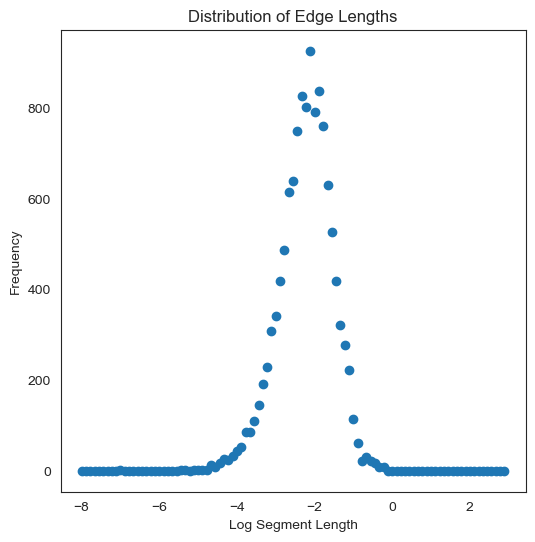

Number of edges selected: 3079


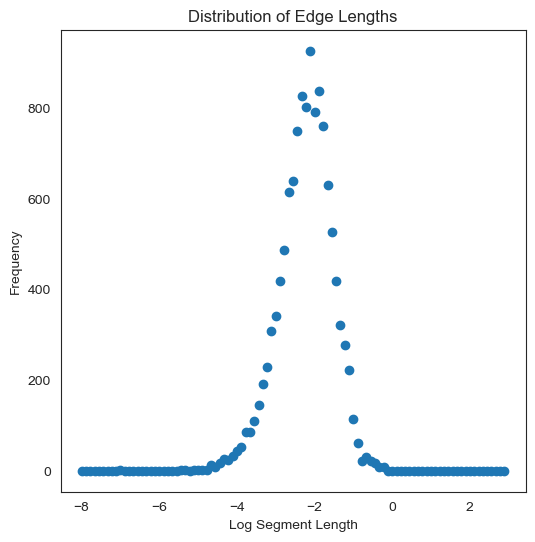

In [100]:
class SegmentLengthDistribution:
    def __init__(self, nodes_df, edges_with_coords_with_length):
        """
        Initializes the GraphProcessor with the node and edge dataframes.

        Args:
            nodes_df (pd.DataFrame): DataFrame containing node information.
            edges_with_coords_with_length (pd.DataFrame): DataFrame containing edge data including coordinates and lengths.
        """
        self.nodes_df = nodes_df
        self.edges_df = edges_with_coords_with_length.copy()
        self.normalized_edge_df = self.edges_df.copy()

    def normalize_edges(self):
        """
        Normalize the coordinates and segment lengths in the edge dataframe.
        """
        to_normalize = [
            "source_x",
            "source_y",
            "source_z",
            "target_x",
            "target_y",
            "target_z",
            "segment_length",
        ]

        # Reset the node indices in edges_df to match those in nodes_df
        index_mapping = {
            old_index: new_index
            for new_index, old_index in enumerate(self.nodes_df["node_index"].unique())
        }

        # Map the source and target indices in the edges DataFrame
        self.normalized_edge_df["source"] = self.normalized_edge_df["source"].map(
            index_mapping
        )
        self.normalized_edge_df["target"] = self.normalized_edge_df["target"].map(
            index_mapping
        )

        # Normalize the relevant columns
        for col in to_normalize:
            self.normalized_edge_df[col] = graphToDfUtility.minmax_normalize(
                self.normalized_edge_df[col]
            )

    def create_adjacency_matrix(self, percentile=50):
        """
        Create an adjacency matrix for the graph using the normalized edges.

        Args:
            percentile (float): The percentile threshold to use for selecting edges based on segment length.
                                Default is the 50th percentile (median).

        Returns:
            mat (sparse.coo_matrix): Sparse matrix representing the adjacency matrix.
        """
        Nnodes = self.nodes_df.shape[0]

        # Calculate the length threshold based on the specified percentile
        length_threshold = np.percentile(
            self.normalized_edge_df["segment_length"], percentile
        )

        # Select edges whose length is above the specified percentile threshold
        subedges = self.normalized_edge_df["segment_length"] > length_threshold

        print(f"Number of edges selected: {subedges.sum()}")

        # Construct the adjacency matrix
        mat = sparse.coo_matrix(
            (
                np.ones(self.normalized_edge_df.loc[subedges].shape[0], dtype=int),
                (
                    self.normalized_edge_df.loc[subedges, "source"].values,
                    self.normalized_edge_df.loc[subedges, "target"].values,
                ),
            ),
            shape=(Nnodes, Nnodes),
        )

        return mat

    def find_connected_components(self, mat):
        """
        Find connected components in the graph represented by the adjacency matrix.

        Args:
            mat (sparse.coo_matrix): The adjacency matrix of the graph.

        Returns:
            tuple: A tuple containing the number of components and membership information for nodes.
        """
        ncomp, membership = sparse.csgraph.connected_components(mat)
        return ncomp, membership

    def plot_edge_length_distribution(self):
        """
        Visualize the distribution of edge lengths using a histogram. This helps us understand the distribution of
        segment lengths in the graph.
        """
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))

        # Histogram of segment lengths (log-binned)
        dist, bins = np.histogram(
            self.normalized_edge_df["segment_length"].values,
            bins=np.exp(np.linspace(-8, 3, 100)),
        )

        # Scatter plot of the log-transformed bins against the distribution
        ax.scatter(np.log(bins[:-1]), dist)

        # Add labels
        ax.set_xlabel("Log Segment Length")
        ax.set_ylabel("Frequency")
        ax.set_title("Distribution of Edge Lengths")

        plt.show()


# Example usage
graph_processor = SegmentLengthDistribution(nodes_df, edges_with_coords_with_length)
graph_processor.normalize_edges()
adjacency_matrix = graph_processor.create_adjacency_matrix(
    percentile=25
)  # Using 75th percentile instead of median
n_components, membership = graph_processor.find_connected_components(adjacency_matrix)
graph_processor.plot_edge_length_distribution()

adjacency_matrix = graph_processor.create_adjacency_matrix(
    percentile=75
)  # Using 75th percentile instead of median
n_components, membership = graph_processor.find_connected_components(adjacency_matrix)
graph_processor.plot_edge_length_distribution()

# BUNDLE


In [101]:
# get dictionary of segment length, 25th, 50th, 75th percentile
segment_length_dict = {
    "10th_percentile": edge_df_with_source_target_coords["segment_length"].quantile(
        0.10
    ),
    "25th_percentile": edge_df_with_source_target_coords["segment_length"].quantile(
        0.25
    ),
    "50th_percentile": edge_df_with_source_target_coords["segment_length"].median(),
    "75th_percentile": edge_df_with_source_target_coords["segment_length"].quantile(
        0.75
    ),
}
segment_length_dict

{'10th_percentile': 209.7886139596345,
 '25th_percentile': 337.1778414535485,
 '50th_percentile': 534.0543206838253,
 '75th_percentile': 799.2093147884868}

## Set Threshold for Edge Length


In [102]:
# get edges to bundle above a certain threshold
# threshold = 0.03
threshold = segment_length_dict["25th_percentile"]
edges_to_bundle = edge_df_with_source_target_coords["segment_length"] > threshold
edges_to_bundle_df = edge_df_with_source_target_coords.loc[edges_to_bundle].reset_index(
    drop=True
)
print(f"Total Nr of Pruned Edges: {len(edge_df_with_source_target_coords)}")
print(f"Edges to Bundle: {edges_to_bundle.sum()}")
print(
    f"Edges to without bundling: {len(edge_df_with_source_target_coords)- edges_to_bundle.sum()}"
)

Total Nr of Pruned Edges: 12317
Edges to Bundle: 9237
Edges to without bundling: 3080


## Bundling


In [103]:
bundled_edge_pts = hammer_bundle(
    nodes_df[["x", "y", "z"]],
    edges_to_bundle_df[["source", "target"]],
    initial_bandwidth=0.05,
    decay=0.7,
    tension=0.3,
    accuracy=5 * 10**2,
    weight=None,
    advect_iterations=50,
    iterations=5,
    min_segment_length=0.01,
    max_segment_length=0.05,
)
bundled_edge_pts.head()

Process Bundling
Start Bundling
Start Smoothing


,x,y,z
0,-508.928802,-1594.214233,156.626129
1,-523.691071,-1537.867471,185.901228
2,-530.989395,-1471.217031,213.210328
3,-529.252752,-1391.936442,238.202758
4,-522.153005,-1305.087203,261.848501


## Post Bundling Processing

add source and target columns, create clean df and save it


In [104]:
# Example of how to use the class
edge_processor = postBundlingUtility(
    bundled_edge_pts, edges_to_bundle_df, edge_df_with_source_target_coords, threshold
)
final_edges_df = edge_processor.post_process_edges()

Number of bundled edges: 9237
Number of total edges: 12317
Number of straight edges: 3080


# SAVER


In [105]:
e_saver = edgesSaver(final_edges_df, nodes_df)
edges_df_with_color = e_saver.add_color_attr()
edges_df_with_color_year = e_saver.add_year_attr()
edges_df_with_color_year_id = e_saver.add_id_attr()


edges_list = e_saver.transform_edges(
    extra_edge_attributes=["source", "target", "color", "year", "id"]
)

print("Example of an edge:")
print(edges_list[0])

# Save to JSON
e_saver.save_edges_to_json(edges_list, OUTPUT_DIR + EDGES_DATA_FILENAME)
e_saver.save_edges_to_json(
    edges_list,
    THREEJS_OUTPUT_DIR + EDGES_DATA_FILENAME,
)

Color attribute added to edges. 
-1 if inter-clusters, cluster number if intra-cluster edge.
Year attribute added to edges. Using the more recent year if different.
ID attribute added to edges.
Example of an edge:
{'source': 5, 'target': 7, 'color': 32, 'year': 1985, 'id': '5_7', 'points': [{'x': -508.9288024902, 'y': -1594.2142333984, 'z': 156.626129207}, {'x': -523.6910711444, 'y': -1537.8674706969, 'z': 185.9012282556}, {'x': -530.9893946218, 'y': -1471.2170311303, 'z': 213.2103282487}, {'x': -529.2527519717, 'y': -1391.9364416949, 'z': 238.2027581828}, {'x': -522.1530045562, 'y': -1305.0872027728, 'z': 261.8485009544}, {'x': -465.5626525879, 'y': -1121.3656005859, 'z': 269.3207833401}]}
Edges data saved to ../data/09-threeJs/smallchecksample10clusters_edges.json
Edges data saved to /Users/jlq293/Projects/Random Projects/LW-ThreeJS/2d_ssrinetworkviz/src/data/smallchecksample10clusters_edges.json


In [106]:
# save final edges df to csv for easy  access and safety

edges_df_with_color_year_id.to_csv(
    OUTPUT_DIR + "final_bundled_edges_df.csv", index=False
)

# save nodes


In [107]:
# save nodes
OUTPUT_DIRA = OUTPUT_DIR + NODES_DATA_FILENAME

OUTPUT_DIRB = THREEJS_OUTPUT_DIR + NODES_DATA_FILENAME

n_saver = nodesSaver()
nodes_json = n_saver.save_dataframe_nodes_to_json(
    nodes_df,
    paths=[OUTPUT_DIRA, OUTPUT_DIRB],
    return_json=True,
    attributes=[
        "node_index",
        "year",
        "title",
        "cluster",
        "doi",
        "centrality",
        "x",
        "y",
        "z",
    ],
)

print("Example of a node:")
nodes_json[0]

Graph nodes saved to ../data/09-threeJs/smallchecksample10clusters_nodes.json
Graph nodes saved to /Users/jlq293/Projects/Random Projects/LW-ThreeJS/2d_ssrinetworkviz/src/data/smallchecksample10clusters_nodes.json
Example of a node:


{'node_index': 53,
 'year': 1982,
 'title': 'Studies on a neuronal-like transport system for serotonin in two cell lines',
 'cluster': 31,
 'doi': '10.1016/S0031-6989(82)80009-X',
 'centrality': 0.00412400255048776,
 'x': -1452.3604736328125,
 'y': 3270.699951171875,
 'z': 6.007529988903536}

In [112]:
n = [node for node in nodes_json if node["cluster"] == 30][0]

In [113]:
n

{'node_index': 457,
 'year': 1986,
 'title': 'Effect of a selective serotonin uptake inhibitor in agoraphobia with panic attacks A double‐blind comparison of zimeldine, imipramine and placebo',
 'cluster': 30,
 'doi': '10.1111/j.1600-0447.1986.tb02666.x',
 'centrality': 0.127035206960555,
 'x': 731.8146362304688,
 'y': -2173.88671875,
 'z': 232.19686570408942}

# Parameter Determination


In [54]:
def explore_hammer_bundle_params(
    edges_df, nodes_df, params, num_runs=5, base_output_dir="output"
):
    """
    Explore different parameter combinations for the hammer_bundle algorithm,
    post-process results, and save outputs.

    Args:
    edges_df (pd.DataFrame): DataFrame containing edge information.
    nodes_df (pd.DataFrame): DataFrame containing node information.
    params (dict): Dictionary of parameter ranges to explore.
    num_runs (int): Number of parameter combinations to try.
    base_output_dir (str): Base directory for saving outputs.

    Returns:
    list: List of dictionaries containing results and file paths for each run.
    """
    global_start_time = time.time()

    all_combinations = list(
        product(
            params["min_edge_length_percentiles"],
            params["initial_bandwidth_values"],
            params["decay_values"],
            params["tension_values"],
            params["min_segment_length_values"],
        )
    )

    print(f"Nr of all possible combinations:", len(all_combinations))

    selected_combinations = np.random.choice(
        len(all_combinations), num_runs, replace=False
    )

    print(f"Selected Combinations:")
    for run in selected_combinations:
        print(all_combinations[run])

    results = []

    for i, combo_index in enumerate(selected_combinations):
        combo = all_combinations[combo_index]
        (
            min_edge_length_percentile,
            initial_bandwidth,
            decay,
            tension,
            min_segment_length,
        ) = combo

        print(f"\nRun {i+1}/{num_runs}")
        print(
            f"Parameters: \n min_edge_length_percentile={min_edge_length_percentile}\n initial_bandwidth={initial_bandwidth}\n decay={decay}\n tension={tension}\n min_segment_length={min_segment_length}"
        )

        # Create a unique identifier for this run
        run_id = f"run_{i+1}_perc{min_edge_length_percentile}_bw{initial_bandwidth}_d{decay}_t{tension}_msl{min_segment_length}"

        # Create output directory for this run
        run_output_dir = os.path.join(base_output_dir, run_id)
        os.makedirs(run_output_dir, exist_ok=True)

        # Calculate threshold and prepare edges for bundling
        threshold = np.percentile(
            edges_df["segment_length"], min_edge_length_percentile
        )
        edges_to_bundle = edges_df["segment_length"] > threshold
        edges_to_bundle_df = edges_df.loc[edges_to_bundle].reset_index(drop=True)

        print(f"Total Nr of Pruned Edges: {len(edges_df)}")
        print(f"Edges to Bundle: {edges_to_bundle.sum()}")

        start_time = time.time()

        try:
            # Run hammer_bundle
            bundled_edge_pts = hammer_bundle(
                nodes_df[["x", "y", "z"]],
                edges_to_bundle_df[["source", "target"]],
                initial_bandwidth=initial_bandwidth,
                decay=decay,
                tension=tension,
                accuracy=5 * 10**2,
                weight=None,
                advect_iterations=50,
                iterations=5,
                min_segment_length=min_segment_length,
                max_segment_length=0.05,
            )

            # Post-processing
            edge_processor = postBundlingUtility(
                bundled_edge_pts, edges_to_bundle_df, edges_df, threshold
            )
            final_edges_df = edge_processor.post_process_edges()

            edge_saver = edgesSaver(final_edges_df, nodes_df)
            edges_df_with_color = edge_saver.add_color_attr()
            edges_list = edge_saver.transform_edges(
                extra_edge_attributes=["source", "target", "color"]
            )
            # Save edges to JSON
            edges_filename = f"edges_{run_id}.json"
            edge_saver.save_edges_to_json(
                edges_list, os.path.join(run_output_dir, edges_filename)
            )
            # Save nodes to JSON
            nodes_filename = f"nodes_{run_id}.json"
            nodes_saver = nodesSaver()
            nodes_json = nodes_saver.save_dataframe_nodes_to_json(
                nodes_df,
                paths=[os.path.join(run_output_dir, nodes_filename)],
                return_json=True,
                attributes=[
                    "doi",
                    "year",
                    "title",
                    "cluster",
                    "centrality",
                    "x",
                    "y",
                    "z",
                    "node_index",
                ],
            )
            end_time = time.time()
            runtime = end_time - start_time
            results.append(
                {
                    "RUN": i + 1,
                    "run_id": run_id,
                    "parameters": {
                        "min_edge_length_percentile": min_edge_length_percentile,
                        "initial_bandwidth": initial_bandwidth,
                        "decay": decay,
                        "tension": tension,
                        "min_segment_length": min_segment_length,
                    },
                    "edges_bundled": int(edges_to_bundle.sum()),
                    "runtime": runtime,
                    "output_dir": run_output_dir,
                }
            )

            print(f"Run completed in {runtime:.2f} seconds")
            # print(f"Results saved in {run_output_dir}")

        except Exception as e:
            print(f"Error in run: {str(e)}")

    print(f"\nTotal time taken: {time.time() - global_start_time:.2f} seconds")
    results.append({"total_runtime": str(time.time() - global_start_time)})

    # Save summary of all runs
    summary_file = os.path.join(base_output_dir, "exploration_summary.json")
    with open(summary_file, "w") as f:
        json.dump(results, f, indent=2)

    return results

In [56]:
# Assuming edges_df and nodes_df are already defined
params = {
    "min_edge_length_percentiles": [15, 30],  #  [15],
    "initial_bandwidth_values": [0.025, 0.05, 0.10, 0.2],  #  [0.05],
    "decay_values": [0.75, 0.5, 0.25],  #  [0.5],
    "tension_values": [0.3, 0.1],  # [0.3],
    "min_segment_length_values": [0.01],
}

base_output_dir = OUTPUT_DIR + "ParamsFinding"

num_runs = 5

results = explore_hammer_bundle_params(
    edge_df_with_source_target_coords,
    nodes_df,
    params,
    num_runs=5,
    base_output_dir=base_output_dir,
)

Nr of all possible combinations: 48
Selected Combinations:
(30, 0.2, 0.75, 0.1, 0.01)
(30, 0.2, 0.25, 0.1, 0.01)
(30, 0.025, 0.25, 0.3, 0.01)
(15, 0.05, 0.5, 0.3, 0.01)
(30, 0.025, 0.75, 0.3, 0.01)

Run 1/5
Parameters: 
 min_edge_length_percentile=30
 initial_bandwidth=0.2
 decay=0.75
 tension=0.1
 min_segment_length=0.01
Total Nr of Pruned Edges: 297
Edges to Bundle: 208
Process Bundling
Start Bundling
Start Smoothing
Number of bundled edges: 208
Number of total edges: 297
Number of straight edges: 89
Color attribute added to edges. 
-1 if inter-clusters, cluster number if intra-cluster edge.
Edges data saved to ../data/09-threeJs/ParamsFinding/run_1_perc30_bw0.2_d0.75_t0.1_msl0.01/edges_run_1_perc30_bw0.2_d0.75_t0.1_msl0.01.json
Graph nodes saved to ../data/09-threeJs/ParamsFinding/run_1_perc30_bw0.2_d0.75_t0.1_msl0.01/nodes_run_1_perc30_bw0.2_d0.75_t0.1_msl0.01.json
Run completed in 220.34 seconds

Run 2/5
Parameters: 
 min_edge_length_percentile=30
 initial_bandwidth=0.2
 decay=0.2

In [57]:
results

[{'RUN': 1,
  'run_id': 'run_1_perc30_bw0.2_d0.75_t0.1_msl0.01',
  'parameters': {'min_edge_length_percentile': 30,
   'initial_bandwidth': 0.2,
   'decay': 0.75,
   'tension': 0.1,
   'min_segment_length': 0.01},
  'edges_bundled': 208,
  'runtime': 220.3417251110077,
  'output_dir': '../data/09-threeJs/ParamsFinding/run_1_perc30_bw0.2_d0.75_t0.1_msl0.01'},
 {'RUN': 2,
  'run_id': 'run_2_perc30_bw0.2_d0.25_t0.1_msl0.01',
  'parameters': {'min_edge_length_percentile': 30,
   'initial_bandwidth': 0.2,
   'decay': 0.25,
   'tension': 0.1,
   'min_segment_length': 0.01},
  'edges_bundled': 208,
  'runtime': 39.33353400230408,
  'output_dir': '../data/09-threeJs/ParamsFinding/run_2_perc30_bw0.2_d0.25_t0.1_msl0.01'},
 {'RUN': 3,
  'run_id': 'run_3_perc30_bw0.025_d0.25_t0.3_msl0.01',
  'parameters': {'min_edge_length_percentile': 30,
   'initial_bandwidth': 0.025,
   'decay': 0.25,
   'tension': 0.3,
   'min_segment_length': 0.01},
  'edges_bundled': 208,
  'runtime': 14.971219062805176,
  '

In [19]:
nodes_df.head()

,_nx_name,doi,year,title,cluster,centrality,x,y,z,node_index
0,0,10.1016/0024-3205(82)90686-5,1982,Serotonergic mechanism in the control of β-end...,70,0.045627,-460.894348,2466.666748,79.636100,0
1,1,10.1111/j.1600-0404.1982.tb03382.x,1982,EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRA...,65,0.010706,610.518616,1883.325684,18.642385,1
2,2,,1982,Treatment of intention myoclonus with paroxeti...,41,0.039863,2311.516602,-485.694855,69.568302,2
3,3,10.1007/BF01276577,1982,"Paroxetine, a potent selective long-acting inh...",10,0.143721,941.044189,1380.987427,250.968820,3
4,4,10.1111/j.1600-0404.1982.tb04525.x,1982,Treatment of myoclonic syndromes with paroxeti...,41,0.053676,1963.945923,432.923309,93.694858,4


In [12]:
ejac = nodes_df[nodes_df["cluster"] == 40].sort_values("centrality", ascending=False)

In [13]:
ejac

,_nx_name,doi,year,title,cluster,centrality,x,y,z,node_index
2174,2174,,1992,Fluoxetine.,40,1.000000,710.296814,-434.319336,1746.563232,2174
3457,3457,,1995,Fluoxetine,40,0.908954,686.785828,-453.093658,1587.541132,3457
5723,5723,10.3109/15563659809162602,1998,Fluoxetine,40,0.898381,481.564789,-455.217499,1569.072576,5723
1796,1796,,1992,Fluoxetine,40,0.879599,623.787415,-414.286346,1536.267507,1796
1505,1505,,1991,Safety and efficacy of fluoxetine [3],40,0.861991,519.516052,-573.878540,1505.513163,1505
...,...,...,...,...,...,...,...,...,...,...
19957,19957,10.1136/dtb.2011.02.0065,2011,Citalopram: Warning about using doses above 40...,40,0.005373,1200.767456,-2098.522217,9.327597,19957
5281,5281,10.1016/S0924-9338(97)86375-4,1997,Are there differential effects of fluoxetine i...,40,0.005104,1824.840576,51.640347,8.857305,5281
7593,7593,10.1089/cap.2000.10.27,2000,Fluoxetine-related death in a child with cytoc...,40,0.004192,106.229050,-610.905029,7.263902,7593
3902,3902,10.1097/00002826-199502000-00013,1995,Nightmares related to fluoxetine treatment,40,0.003210,1101.146362,-330.473846,5.549546,3902
